# Basic Image Classification
---
[Original tutorial](https://www.tensorflow.org/tutorials/keras/classification) - Adapted by [Daan Brocatus](https://daanbrocatus.nl/)

### Setup
First we need to import all the necessary libraries. We'll use TensorFlow for the machine learning stuff, NumPy to work with the data, and MatPlotLib to plot some steps in order to get a visual representation of what we're doing.

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Now, we need to import the dataset we're going to use. We also need to manually specify the class names for the images, as the dataset does not come with those. We are using a dataset that is present by default in TensorFlow.

In [6]:
fashion_dataset = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_dataset.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

After doing so, the following two methods will help us plot the data to inspect it. Don't worry too much about their contents.

In [7]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Normalize/scale images
First of all, let's inspect one of the images that we imported.

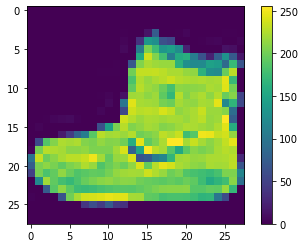

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Let's scale the images to a size between 0 and 1, to make sure all the images have the same size-format. This also makes it easier for the model to perform computations on them.

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

So now all the images will look like the following. This snippet just displays some of the images used for training.

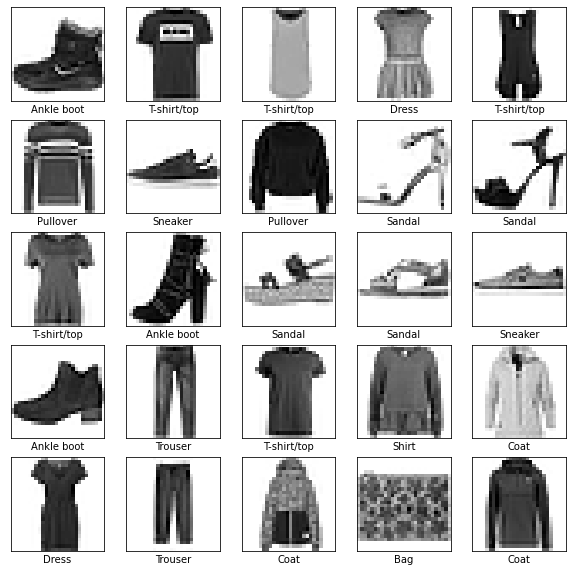

In [10]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Time to create our Neural Network! This Neural Network has three layers. The first layer `Flatten` transforms the images from a 2d-array to a 1d-array. The second layer is a `Dense` layer of 128 nodes that each accept an input and give an output. The third `Dense` layer returns a `logits` array of 10. A logit is a unit of probability. This array with 10 entities represents the likelihood of an image belonging to a class.

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Transforms images from a 2d-array to a 1d-array.
    tf.keras.layers.Dense(128, activation='relu'),  # Dense layer of 128 nodes.
    tf.keras.layers.Dense(10)  # Dense layer that returns a logits array of length 10.
])

2022-09-21 12:52:11.416253: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-21 12:52:11.416409: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-21 12:52:11.416517: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (daanb-ZenBook-UX433FA): /proc/driver/nvidia/version does not exist
2022-09-21 12:52:11.417707: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Now let's compile the model. Compiling the model basically boils down to configuring it. There are three parameters that are relevant. The first one is the optimizer, this is how the model is updated based on the data it sees and its loss function. The second one is the loss function itself, this is used to measure the models accuracy. The model uses this function to steer itself in the right direction during training. The last one is the metrics factor. This is the factor that the model will take into consideration when evaluating itself. In our case, we use accuracy, because we're aiming to make the model as accurate as possible.

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Finally, it's time to train the model! We use the training dataset that we imported from the base dataset for this. We use 10 `epochs`. This means that the model trains itself 10 times, and uses its most accurate version.

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 13ms/step - loss: 0.4978 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3735 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.3320 - accuracy: 0.8801
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3118 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2919 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2753 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2652 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2554 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2454 - accuracy: 0.9095
Epoch 10/10
1875/1875 [==============================] - 23s 12m

After training our model, it is time to see how accurate it is with new data. We use the training dataset we imported from the base dataset earlier on.

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', str(test_acc * 100) + "%")

313/313 - 3s - loss: 0.3216 - accuracy: 0.8900 - 3s/epoch - 9ms/step

Test accuracy: 88.99999856948853%


With the model trained, we can use it to make predictions about images. Attach a `softmax` layer to convert the models linear output (the `logits` you read about earlier) to probabilities. This makes it easier to interpret to us humble humans.

In [17]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 3s 8ms/step


With our predictions made, it is time to check out the first one! The prediction array is made up out of 10 numbers, each number represents the models "confidence" that the image in question belongs to the category with that ID.

In [18]:
print(predictions[0])

[1.5013997e-10 4.0403614e-11 3.3190553e-12 3.9425826e-15 2.3349508e-10
 3.3505347e-03 2.3973681e-10 1.0207305e-03 2.1191815e-08 9.9562865e-01]


This however is still not easy to interpret, so let's look at the image, the predictions made and the array they are in. The correct labels are colored blue, and the incorrect ones are colored red. The numbers represent the percentage of confidence for the predicted label/classification.

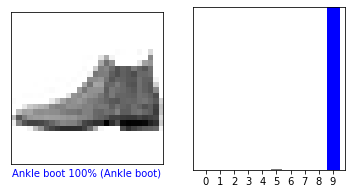

In [19]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

That's better! But it is just one prediction. Let's have a look at some more.

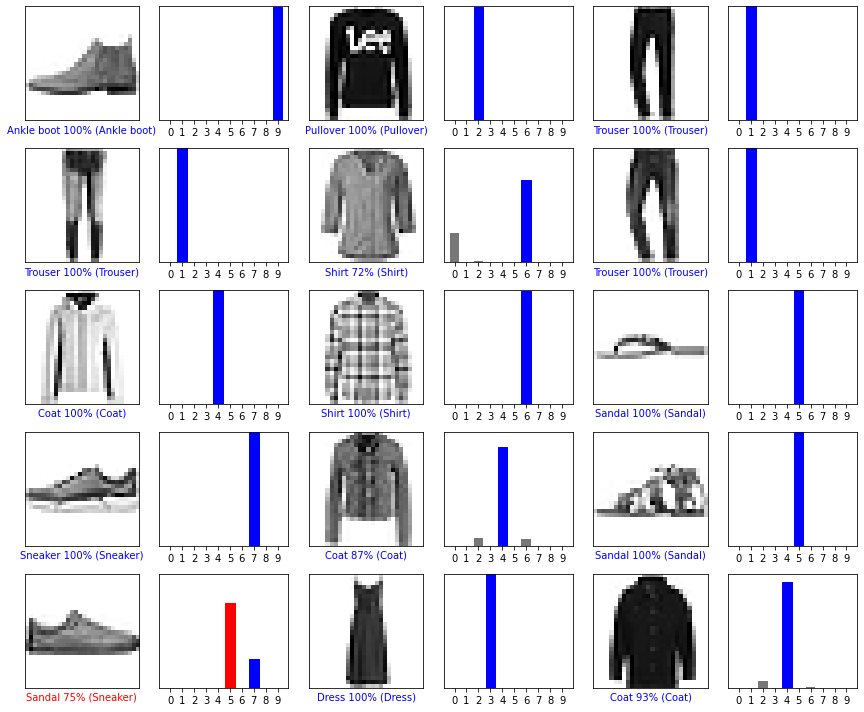

In [20]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Cool right? our model is pretty accurate! Now let's have a look how we can use this model to cast a prediction on a single image, so we can use this in a real-world scenario.

The first step is to grab one of the images from the dataset, and then adding it to a batch where it's the only member.

In [21]:
img = test_images[1]

img = (np.expand_dims(img, 0))

And finally, let's predict the class and plot this prediction.

1/1 [==============================] - 0s 118ms/step


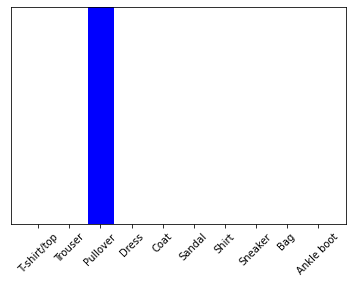

In [22]:
predictions_single = probability_model.predict(img)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

That's it! You now have a trained Neural Network capable of prediction a clothing item's class.